In [1]:
import pandas as pd
import numpy as np
import random as rnd

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

# 1. Data Gathering

In [2]:
traindf = pd.read_csv('train.csv')
testdf = pd.read_csv('test.csv')
# Import dataset
df1 = [traindf, testdf]
# df1 if used in training a model

# 2. Data Analysis

In [3]:
traindf.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
traindf.info()
#891 samples out of 2224 from the problem

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
testdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [6]:
traindf.describe()
#Mean of Survived is 0.38 which means 38% survived, the mean age was 29.
## Age of those in the sample were relatively young since at 75% of the bell
## curve was age 38. which means <1% of the sample were the elder people
## The fare has the highest of 512 which only belongs to <1% of the sample

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
traindf.describe(include=['O'])
#For object data types, Name, Sex, Ticket, Cabin, Embarked
# The data shows that there are 577 male and 314 Female in the sample

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


# Analysis

1. Cabin is not going to be used sinced not everyone has a cabin in the dataset.

2. Ticket does not matter since it will not contribute to survivability, the ticket type or number does not attribute to survivability however the price of the ticket could somehow produce a useful input.

3. Passenger ID does not matter since it will not contribute to survivability even if it is a seat number since it does not mean that they were sitting their during the disaster.

3. Name will not be used as a feature since you will not survive because of your name unless you are really a VIP. Only the titles can be possibly used to find correlation with survivability.


In [8]:
traindf[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)
# This groups the Pclass and get the total mean for the 'Survived' column
# The data shows that 62% of those in 1st class survived and a decreasing 
# survival rate when the passenger class gets higher.

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [9]:
traindf[["Sex", "Survived"]].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)
# This tries to find a correlation with Sex and suvivability
# The result shows that 74% of females survived and only 18% of the males did
# This could've occured since females get priority during evacuations.
# This 

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [10]:
traindf[["SibSp", "Survived"]].groupby(['SibSp'], as_index=False).mean().sort_values(by='Survived', ascending=False)
# Shows a possible correlation with those who have a sibling or spouse to survivability

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


In [11]:
traindf[["Parch", "Survived"]].groupby(['Parch'], as_index=False).mean().sort_values(by='Survived', ascending=False)
# Shows a correlation of survivability if you are with your parent or children

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


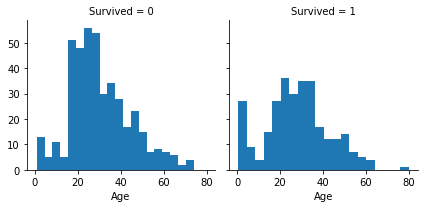

In [12]:
g = sns.FacetGrid(traindf, col='Survived')
g.map(plt.hist, 'Age', bins=20)
# A graph that shows an overview of the age of those who survived and did not.

# Obs on the graph
1. The graph shows that children survived especially those that were still babies or children. This may occur since they do not need as much space in lifeboats.


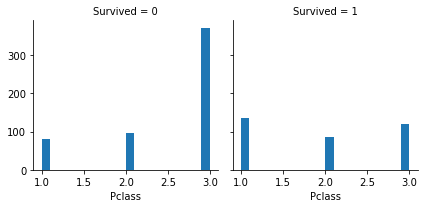

In [13]:
g = sns.FacetGrid(traindf, col='Survived')
g.map(plt.hist, 'Pclass', bins=20)

# Obs on the graph
1. The graph shows that a lot of those from the lower class perished which means class does matter during this disaster.
2. Those in the middle class were almost equal in terms of those who survived and those who did not.
3. The were more of those in the first class that survived than those who perished. This possibly occured in terms of priority such as being sponsors or being forewarned of the disaster. It is safe to assume that having a higher class means you are more likely to survive.

C:\Users\kylle\miniconda3\envs\myenv2\lib\site-packages\seaborn\axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


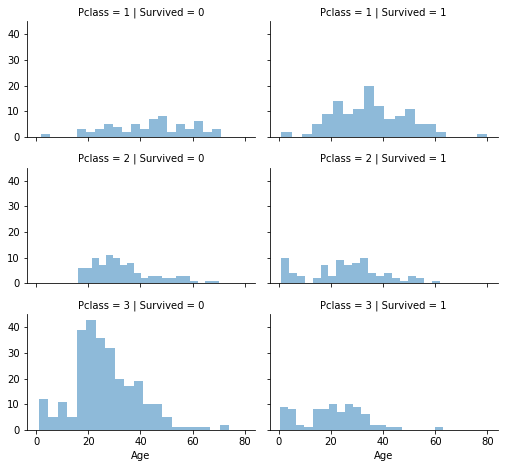

In [14]:
grid = sns.FacetGrid(traindf, col='Survived', row='Pclass',
                     size=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend();
# Plotting the relationship of Survivability of those in each passenger classes with age.

# Obs on graph
1. In passenger class 2 as well as class 1 have close to no fatality on children less than 16 y/o. Which means it is safe to assume that children from a higher class is most likely to survive than others.
2. On Passenger class 3 despite having the most fatalities shows that children or infants were more likely to survive the disaster.

C:\Users\kylle\miniconda3\envs\myenv2\lib\site-packages\seaborn\axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\kylle\miniconda3\envs\myenv2\lib\site-packages\seaborn\axisgrid.py:670: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


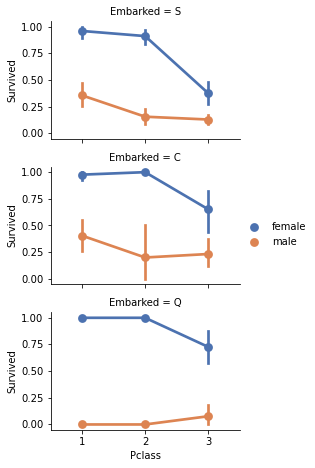

In [15]:
# grid = sns.FacetGrid(traindf, row='Embarked', size=2.2, aspect=1.6)
# grid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', palette='deep')
# grid.add_legend()
# sns.catplot(x='Pclass',col='Embarked',y='Survived',hue='Sex',data=traindf,kind='point')
grid = sns.FacetGrid(traindf, row='Embarked', size=2.2, aspect=1.6)
grid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', palette='deep', hue_order=['female','male'])
grid.add_legend()
# The code above shows a plot if there is any relation between being embarked 
# On a certain port increases you chance of survival during the disaster.

# Obs on the graph
1. The plot shows that being embarked as a female means that you are a survivor.

2. The plots also shows that the trend in classes continues. There are more survivors from higher classes in percentage than that of the 3rd class. Except for the third port which can be seen later.

3. The plots compares the possibility of an increase in the chance of survival if you were embarked at a certain port with a certain gender.

C:\Users\kylle\miniconda3\envs\myenv2\lib\site-packages\seaborn\axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\kylle\miniconda3\envs\myenv2\lib\site-packages\seaborn\axisgrid.py:670: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


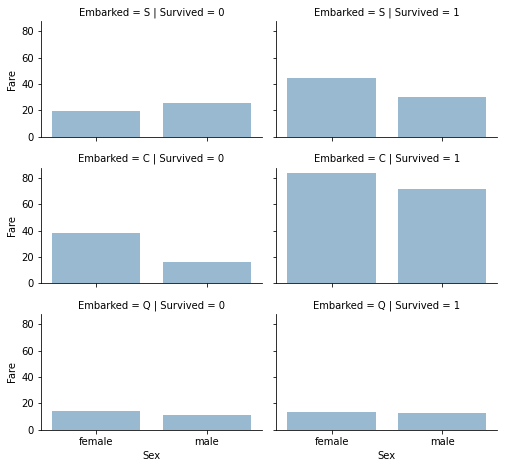

In [16]:
grid = sns.FacetGrid(traindf, row='Embarked', col='Survived',
                     size=2.2, aspect=1.6)
grid.map(sns.barplot, 'Sex', 'Fare', alpha=.5, ci=None)
grid.add_legend()

# Obs on the graph
1. When embarked on S, having a higher Fare showed that those who survived were averaging a higher fare than those that have a lower average fare
2. When embarked on C, having a higher fare also means a higher chance of survivability.
3. When embarked on Q, the average fare were not as high as the other ports which means that those who were embarked at Q were mostly lower class since there average fare were fairly low.

C:\Users\kylle\miniconda3\envs\myenv2\lib\site-packages\seaborn\axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


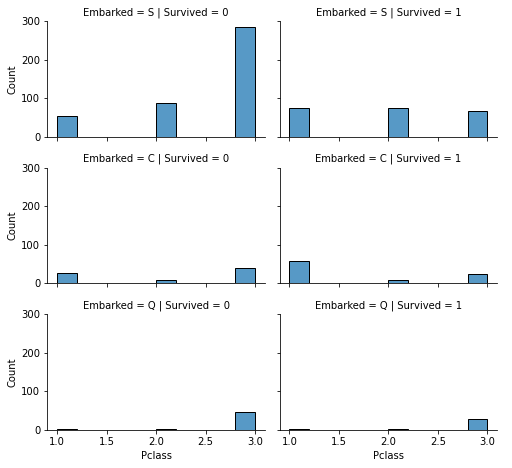

In [17]:
grid = sns.FacetGrid(traindf, row='Embarked', col='Survived',
                     size=2.2, aspect=1.6)
grid.map(sns.histplot, 'Pclass', bins=10)
grid.add_legend()
# A graph that shows a visual amount of the class which embarked on a certain port
# as well as an idea of how many survived based on classes and embarking.

# Obs on the graph
1. It shows that having a lower class relates with not surviving the disaster. When embarked at S having a higher class have a higher chance of survival. This is observed at the amount of class 3 people that did not survive relative to the amount that did. This further strenghthens the assumption that classes does matter.

2. Embarked on C shows a graph similar to being embarked on port S although at a lower scale. It shows that there were more Class 1 that survived and that the majority of people in port C were Class 1 passengers. It also shows that Class 3 passengers that survived were less than those that did not.

3. Embarked on Q shows that there were fewer of the wealthier class than that of class 3 and yet it still continues the trend of lower survivability if you are a class 3 passenger. As there are more of the class 3 that died than didn't.

# Cleaning the Data

In [18]:
traindf = traindf.drop(['Ticket', 'Cabin'], axis=1)
testdf = testdf.drop(['Ticket', 'Cabin'], axis=1)
#this code drops features that will not be used since there were visibly no correlation
#that can be made to prove that they increase survivability.
df1 = [traindf, testdf]

In [19]:
traindf = traindf.drop(['Name', 'PassengerId'], axis=1)
# Drops unneeded data such as name and passengerID

In [20]:
traindf

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S
887,1,1,female,19.0,0,0,30.0000,S
888,0,3,female,NaN,1,2,23.4500,S
889,1,1,male,26.0,0,0,30.0000,C


In [21]:
testdf = testdf.drop(['Name', 'PassengerId'], axis=1)
# Drops unneeded data such as name and passengerID

In [22]:
testdf

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,34.5,0,0,7.8292,Q
1,3,female,47.0,1,0,7.0000,S
2,2,male,62.0,0,0,9.6875,Q
3,3,male,27.0,0,0,8.6625,S
4,3,female,22.0,1,1,12.2875,S
...,...,...,...,...,...,...,...
413,3,male,NaN,0,0,8.0500,S
414,1,female,39.0,0,0,108.9000,C
415,3,male,38.5,0,0,7.2500,S
416,3,male,NaN,0,0,8.0500,S


In [23]:
df1=[traindf,testdf]
traindf.shape

(891, 8)

In [24]:
testdf.shape

(418, 7)

In [25]:
for dataset in df1:
    dataset['Sex'] = dataset['Sex'].map( {'female': 1, 'male': 0} ).astype(int)
# Replaces Female with 1 and Male with 0
traindf.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22.0,1,0,7.2500,S
1,1,1,1,38.0,1,0,71.2833,C
2,1,3,1,26.0,0,0,7.9250,S
3,1,1,1,35.0,1,0,53.1000,S
4,0,3,0,35.0,0,0,8.0500,S


In [26]:
traindf.describe()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,0.352413,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,0.477990,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,0.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,1.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,512.329200


# Age
1. There are holes in the age category.
2. To fill up these holes we can guess there age with the means of their Pclass as well as their gender

C:\Users\kylle\miniconda3\envs\myenv2\lib\site-packages\seaborn\axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


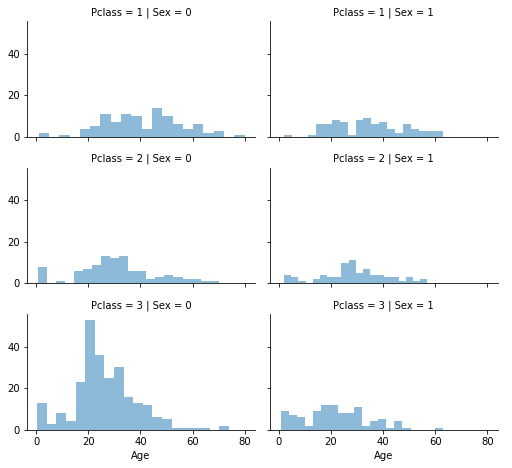

In [27]:
grid = sns.FacetGrid(traindf, row='Pclass', col='Sex', size=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend()

In [28]:
guess_ages = np.zeros((2,3))
guess_ages

#2 x 3 matrix is used to 2 Sex types as well as 3 passenger types
# this matrix will contain the means of the ages of the specific sex and passenger type

array([[0., 0., 0.],
       [0., 0., 0.]])

In [29]:
for dataset in df1:
    for i in range(0, 2):
        for j in range(0, 3):
            #used to access the 2x3 matrix 
            guess_df = dataset[(dataset['Sex'] == i) & (dataset['Pclass'] == j+1)]['Age'].dropna()
            # The code above is used to compile the ages of Sex = i an Class = j+1
            # dropna at the end removes the rows that has a NaN value
            # so that the median will be accurate

            age_guess = guess_df.median()
            # The code gets the median using .median
            # Convert random age float to nearest .5 age rounded of to 0.5 
            # to have a simpler mean
            guess_ages[i,j] = int( age_guess/0.5 + 0.5 ) * 0.5
            # this inserts the median into the 2x3 matrix previously to
            # be used at the following code.
    for i in range(0, 2):
        for j in range(0, 3):
            dataset.loc[ (dataset.Age.isnull()) & (dataset.Sex == i) & (dataset.Pclass == j+1),\
                    'Age'] = guess_ages[i,j]
            # The code finds the holes(NaN) in the data using i and j and inputs
            # the corresponding mean compiled on matrix guess_age
    dataset['Age'] = dataset['Age'].astype(int)
            #The code above changes the type to int
traindf.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22,1,0,7.2500,S
1,1,1,1,38,1,0,71.2833,C
2,1,3,1,26,0,0,7.9250,S
3,1,1,1,35,1,0,53.1000,S
4,0,3,0,35,0,0,8.0500,S


# Description of above code
- The code above was used to fill holes in the data and to minimize random noise if other method was used to fill the holes in the age column.

In [30]:
traindf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    int32  
 3   Age       891 non-null    int32  
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(1), int32(2), int64(4), object(1)
memory usage: 48.9+ KB


# Description of current .info()
- It can be seen that there are no more null values in the age column on only the embarked column has the only one with 2 holes.

In [31]:
for dataset in df1:
    dataset['FamilySize'] = dataset['SibSp'] + dataset['Parch'] + 1
# Creates a column for the total number of family size in df1.
traindf[['FamilySize', 'Survived']].groupby(['FamilySize'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,FamilySize,Survived
3,4,0.724138
2,3,0.578431
1,2,0.552795
6,7,0.333333
0,1,0.303538
4,5,0.200000
5,6,0.136364
7,8,0.000000
8,11,0.000000


# Description of above code
- The code above grouped those with similar family sizes and computed for the mean for surviving. 
- It showed a relation that having siblings, children, spouses, or parents have an increased chanced in surviving. However 

In [32]:
for dataset in df1:
    dataset['IsAlone'] = 0
    dataset.loc[dataset['FamilySize'] == 1, 'IsAlone'] = 1

traindf[['IsAlone', 'Survived']].groupby(['IsAlone'], as_index=False).mean()

,IsAlone,Survived
0,0,0.505650
1,1,0.303538


# Description of above code
- Compiling passengers that are considered alone showed that only 30% of those who were alone survived while 50% of those that we're not alone survived.

In [33]:
traindf = traindf.drop(['Parch', 'SibSp', 'FamilySize'], axis=1)
testdf = testdf.drop(['Parch', 'SibSp', 'FamilySize'], axis=1)
df1 = [traindf, testdf]
# Drops parch Sibsp and family size from both dataset
traindf.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,IsAlone
0,0,3,0,22,7.2500,S,0
1,1,1,1,38,71.2833,C,0
2,1,3,1,26,7.9250,S,1
3,1,1,1,35,53.1000,S,0
4,0,3,0,35,8.0500,S,1


In [34]:
freq_port = traindf.Embarked.dropna().mode()[0]
freq_port

'S'

In [35]:
for dataset in df1:
    dataset['Embarked'] = dataset['Embarked'].fillna(freq_port)
    
traindf[['Embarked', 'Survived']].groupby(['Embarked'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.339009


# Data cleaning for Embarked
- To find the most frequent port embarked from; use the function mode() then fill the na in the embarked dataset.
- A chart also shows how many survived from those that embarked on a certain port.

In [36]:
for dataset in df1:
    dataset['Embarked'] = dataset['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2} ).astype(int)
# Change categorical to integer for machine learning
traindf.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,IsAlone
0,0,3,0,22,7.2500,0,0
1,1,1,1,38,71.2833,1,0
2,1,3,1,26,7.9250,0,1
3,1,1,1,35,53.1000,0,0
4,0,3,0,35,8.0500,0,1


In [37]:
testdf['Fare'].fillna(testdf['Fare'].dropna().median(), inplace=True)
testdf.head()
# fills fare that are 0 to be equal to the mean of the fare.

,Pclass,Sex,Age,Fare,Embarked,IsAlone
0,3,0,34,7.8292,2,1
1,3,1,47,7.0000,0,0
2,2,0,62,9.6875,2,1
3,3,0,27,8.6625,0,1
4,3,1,22,12.2875,0,0


In [38]:
X=traindf.iloc[:,1:8]
y=traindf.iloc[:,0]
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=123)
# Split train DF into testing and training to create models that are not overfitted.

## 3A. Choose the model

In [39]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
#Choose the model
forest_clf = RandomForestClassifier()

## 4A. Train the model

In [40]:
#Fit the model
forest_clf.fit(X_train,Y_train)
ran_pred=forest_clf.predict(X_test)

## 5A. Evaluate the model

In [41]:
#Test the model
forest_accuracy = accuracy_score(ran_pred,Y_test)
forest_accuracy = forest_accuracy * 100
#Accuracy of the model
print("Random forest classifier model accuracy = "+str(round(forest_accuracy,2))+"%")

Random forest classifier model accuracy = 77.09%


An accuracy of 77.09% was achieved initially.

## 6A. Hypertuning Parameter

In [42]:
n_estimators = [5,20,50,100] # number of trees in the random forest
max_features = ['auto', 'sqrt'] # number of features in consideration at every split
max_depth = [int(x) for x in np.linspace(10, 120, num = 12)] # maximum number of levels allowed in each decision tree
min_samples_split = [2, 6, 10] # minimum sample number to split a node
min_samples_leaf = [1, 3, 4] # minimum sample number that can be stored in a leaf node
bootstrap = [True, False] # method used to sample data points

random_grid = {'n_estimators': n_estimators,

'max_features': max_features,

'max_depth': max_depth,

'min_samples_split': min_samples_split,

'min_samples_leaf': min_samples_leaf,

'bootstrap': bootstrap}

In [43]:
## Importing Random Forest Classifier from the sklearn.ensemble
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()

In [44]:
from sklearn.model_selection import RandomizedSearchCV
rf_random = RandomizedSearchCV(estimator = rf,param_distributions = random_grid,
               n_iter = 100, cv = 5, verbose=2, random_state=35, n_jobs = -1)

In [45]:
rf_random.fit(X_train, Y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      120],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 3, 4],
                                        'min_samples_split': [2, 6, 10],
                                        'n_estimators': [5, 20, 50, 100]},
                   random_state=35, verbose=2)

In [46]:
print ('Random grid: ', random_grid, '\n')
# print the best parameters
print ('Best Parameters: ', rf_random.best_params_, ' \n')

Random grid:  {'n_estimators': [5, 20, 50, 100], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120], 'min_samples_split': [2, 6, 10], 'min_samples_leaf': [1, 3, 4], 'bootstrap': [True, False]} 

Best Parameters:  {'n_estimators': 50, 'min_samples_split': 6, 'min_samples_leaf': 3, 'max_features': 'sqrt', 'max_depth': 70, 'bootstrap': True}  



In [67]:
randmf = RandomForestRegressor(n_estimators = 50, min_samples_split = 6, min_samples_leaf= 3,
                               max_features = 'sqrt', max_depth= 70, bootstrap=True) 
# Fits the best parameters according to the parameter distribution
# The parameters might change if the code was rerun since the sample split are random
randmf.fit( X_train, Y_train) 

RandomForestRegressor(max_depth=70, max_features='sqrt', min_samples_leaf=3,
                      min_samples_split=6, n_estimators=50)

### Note
- Since the splitting of the dataset is random the best hyperparameter may change after restarting and running the kernel.

In [68]:
y_pred_rf1 = pd.DataFrame( { "actual": Y_test, 
"predicted_prob": randmf.predict( 
( X_test ) ) } ) 
y_pred_rf1

,actual,predicted_prob
561,0,0.021680
641,1,0.973855
400,1,0.063702
498,0,0.898395
875,1,0.620519
...,...,...
339,0,0.284227
841,0,0.166895
442,0,0.253945
815,0,0.049854


In [69]:
#converts greater than 0.5 to 1 for comparison against actual X_test
ran_pred2=(randmf.predict(X_test) > 0.5).astype('int32').tolist()
#Test the model
forest_accuracy = accuracy_score(ran_pred2,Y_test)
forest_accuracy = forest_accuracy * 100
#Accuracy of the model
print("New Random forest classifier model accuracy = "+str(round(forest_accuracy,2))+"%")

New Random forest classifier model accuracy = 80.45%


An increase of atleast 3% in the previous model accuracy was achieved.

## 7A. Prediction of model A

In [50]:
ran_test=(randmf.predict(testdf) > 0.5).astype('int32').tolist()
# rf_prediction = pd.DataFrame(ran_test, columns=['Survived']).to_csv('ran_test.csv')
ran_test

[0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,


The code above is used to test the Random forest model against the testdf model after creating the csv file.

## 3B. Choose the model

In [51]:
import xgboost as xgb
xgb_cl = xgb.XGBClassifier()

C:\Users\kylle\miniconda3\envs\myenv2\lib\site-packages\xgboost\compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


## 4B. Train the model

In [52]:
# Fit
xgb_cl.fit(X_train, Y_train)
# Predict
preds = xgb_cl.predict(X_test)

[00:38:33] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\kylle\miniconda3\envs\myenv2\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\kylle\miniconda3\envs\myenv2\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


## 5B. Evaluate the model

In [53]:
# Score
accuracy_score(Y_test, preds)

0.7988826815642458

## 6B. Hypertuning Parameter

In [54]:
# import machine learning libraries
import xgboost as xgb
from sklearn.metrics import accuracy_score


# import packages for hyperparameters tuning
from hyperopt import STATUS_OK, Trials, fmin, hp, tpe


In [55]:
space={'max_depth': hp.quniform("max_depth", 3, 18, 1),
        'gamma': hp.uniform ('gamma', 1,9),
        'reg_alpha' : hp.quniform('reg_alpha', 40,180,1),
        'reg_lambda' : hp.uniform('reg_lambda', 0,1),
        'colsample_bytree' : hp.uniform('colsample_bytree', 0.5,1),
        'min_child_weight' : hp.quniform('min_child_weight', 0, 10, 1),
        'n_estimators': 180,
        'seed': 0
    }
# Use values found on kaggle by prashant111

In [56]:
def objective(space):
    clf=xgb.XGBClassifier(
                    n_estimators =space['n_estimators'], max_depth = int(space['max_depth']), gamma = space['gamma'],
                    reg_alpha = int(space['reg_alpha']),min_child_weight=int(space['min_child_weight']),
                    colsample_bytree=int(space['colsample_bytree']))
    
    evaluation = [( X_train, Y_train), ( X_test, Y_test)]
    
    clf.fit(X_train, Y_train,
            eval_set=evaluation, eval_metric="auc",
            early_stopping_rounds=10,verbose=False)
    

    pred = clf.predict(X_test)
    accuracy = accuracy_score(Y_test, pred>0.5)
    print ("SCORE:", accuracy)
    return {'loss': -accuracy, 'status': STATUS_OK }
# Evaluates the training data and testing data after setting the parameters

In [57]:
trials = Trials()

best_hyperparams = fmin(fn = objective,
                        space = space,
                        algo = tpe.suggest,
                        max_evals = 100,
                        trials = trials)
# Looks for the best hyperparameter for the model based on the training and testing dataset.

SCORE:                                                                                                                 
0.6145251396648045                                                                                                     
SCORE:                                                                                                                 
0.6145251396648045                                                                                                     
SCORE:                                                                                                                 
0.7821229050279329                                                                                                     
SCORE:                                                                                                                 
0.6145251396648045                                                                                                     
SCORE:                                  

C:\Users\kylle\miniconda3\envs\myenv2\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)

C:\Users\kylle\miniconda3\envs\myenv2\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):

C:\Users\kylle\miniconda3\envs\myenv2\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) 

SCORE:                                                                                                                 
0.6145251396648045                                                                                                     
SCORE:                                                                                                                 
0.6145251396648045                                                                                                     
SCORE:                                                                                                                 
0.6145251396648045                                                                                                     
SCORE:                                                                                                                 
0.6145251396648045                                                                                                     
SCORE:                                  

C:\Users\kylle\miniconda3\envs\myenv2\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)

C:\Users\kylle\miniconda3\envs\myenv2\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):

C:\Users\kylle\miniconda3\envs\myenv2\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) 

SCORE:                                                                                                                 
0.6145251396648045                                                                                                     
SCORE:                                                                                                                 
0.6145251396648045                                                                                                     
SCORE:                                                                                                                 
0.7318435754189944                                                                                                     
SCORE:                                                                                                                 
0.6145251396648045                                                                                                     
SCORE:                                  

C:\Users\kylle\miniconda3\envs\myenv2\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)

C:\Users\kylle\miniconda3\envs\myenv2\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):

C:\Users\kylle\miniconda3\envs\myenv2\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) 

SCORE:                                                                                                                 
0.8044692737430168                                                                                                     
SCORE:                                                                                                                 
0.8044692737430168                                                                                                     
SCORE:                                                                                                                 
0.7318435754189944                                                                                                     
SCORE:                                                                                                                 
0.7821229050279329                                                                                                     
 24%|███████████                        

C:\Users\kylle\miniconda3\envs\myenv2\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)

C:\Users\kylle\miniconda3\envs\myenv2\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):

C:\Users\kylle\miniconda3\envs\myenv2\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) 

SCORE:                                                                                                                 
0.6145251396648045                                                                                                     
SCORE:                                                                                                                 
0.7486033519553073                                                                                                     
SCORE:                                                                                                                 
0.7318435754189944                                                                                                     
SCORE:                                                                                                                 
0.6145251396648045                                                                                                     
SCORE:                                  

C:\Users\kylle\miniconda3\envs\myenv2\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)

C:\Users\kylle\miniconda3\envs\myenv2\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):

C:\Users\kylle\miniconda3\envs\myenv2\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) 

SCORE:                                                                                                                 
0.6145251396648045                                                                                                     
SCORE:                                                                                                                 
0.7821229050279329                                                                                                     
SCORE:                                                                                                                 
0.6145251396648045                                                                                                     
SCORE:                                                                                                                 
0.6145251396648045                                                                                                     
SCORE:                                  

C:\Users\kylle\miniconda3\envs\myenv2\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)

C:\Users\kylle\miniconda3\envs\myenv2\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):

C:\Users\kylle\miniconda3\envs\myenv2\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) 

SCORE:                                                                                                                 
0.7318435754189944                                                                                                     
SCORE:                                                                                                                 
0.6145251396648045                                                                                                     
SCORE:                                                                                                                 
0.6145251396648045                                                                                                     
SCORE:                                                                                                                 
0.6145251396648045                                                                                                     
SCORE:                                  

C:\Users\kylle\miniconda3\envs\myenv2\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)

C:\Users\kylle\miniconda3\envs\myenv2\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):

C:\Users\kylle\miniconda3\envs\myenv2\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) 

SCORE:                                                                                                                 
0.6145251396648045                                                                                                     
SCORE:                                                                                                                 
0.6145251396648045                                                                                                     
SCORE:                                                                                                                 
0.6145251396648045                                                                                                     
SCORE:                                                                                                                 
0.6145251396648045                                                                                                     
SCORE:                                  

C:\Users\kylle\miniconda3\envs\myenv2\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)

C:\Users\kylle\miniconda3\envs\myenv2\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):

C:\Users\kylle\miniconda3\envs\myenv2\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) 

SCORE:                                                                                                                 
0.6145251396648045                                                                                                     
SCORE:                                                                                                                 
0.776536312849162                                                                                                      
SCORE:                                                                                                                 
0.7318435754189944                                                                                                     
SCORE:                                                                                                                 
0.6145251396648045                                                                                                     
SCORE:                                  

C:\Users\kylle\miniconda3\envs\myenv2\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)

C:\Users\kylle\miniconda3\envs\myenv2\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):

C:\Users\kylle\miniconda3\envs\myenv2\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) 

SCORE:                                                                                                                 
0.6145251396648045                                                                                                     
SCORE:                                                                                                                 
0.6145251396648045                                                                                                     
SCORE:                                                                                                                 
0.6145251396648045                                                                                                     
SCORE:                                                                                                                 
0.6145251396648045                                                                                                     
SCORE:                                  

C:\Users\kylle\miniconda3\envs\myenv2\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)

C:\Users\kylle\miniconda3\envs\myenv2\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):

C:\Users\kylle\miniconda3\envs\myenv2\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) 

SCORE:                                                                                                                 
0.6145251396648045                                                                                                     
SCORE:                                                                                                                 
0.7318435754189944                                                                                                     
SCORE:                                                                                                                 
0.6145251396648045                                                                                                     
SCORE:                                                                                                                 
0.776536312849162                                                                                                      
 60%|███████████████████████████▌       

C:\Users\kylle\miniconda3\envs\myenv2\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)

C:\Users\kylle\miniconda3\envs\myenv2\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):

C:\Users\kylle\miniconda3\envs\myenv2\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) 

SCORE:                                                                                                                 
0.7150837988826816                                                                                                     
SCORE:                                                                                                                 
0.6145251396648045                                                                                                     
SCORE:                                                                                                                 
0.6145251396648045                                                                                                     
SCORE:                                                                                                                 
0.6145251396648045                                                                                                     
 63%|████████████████████████████▉      

C:\Users\kylle\miniconda3\envs\myenv2\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):

C:\Users\kylle\miniconda3\envs\myenv2\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)

C:\Users\kylle\miniconda3\envs\myenv2\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif

SCORE:                                                                                                                 
0.6145251396648045                                                                                                     
SCORE:                                                                                                                 
0.776536312849162                                                                                                      
SCORE:                                                                                                                 
0.8044692737430168                                                                                                     
SCORE:                                                                                                                 
0.7821229050279329                                                                                                     
SCORE:                                  

C:\Users\kylle\miniconda3\envs\myenv2\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)

C:\Users\kylle\miniconda3\envs\myenv2\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):

C:\Users\kylle\miniconda3\envs\myenv2\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) 

SCORE:                                                                                                                 
0.8044692737430168                                                                                                     
SCORE:                                                                                                                 
0.7821229050279329                                                                                                     
SCORE:                                                                                                                 
0.8044692737430168                                                                                                     
SCORE:                                                                                                                 
0.6145251396648045                                                                                                     
 72%|█████████████████████████████████  

C:\Users\kylle\miniconda3\envs\myenv2\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)

C:\Users\kylle\miniconda3\envs\myenv2\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):

C:\Users\kylle\miniconda3\envs\myenv2\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) 

SCORE:                                                                                                                 
0.6145251396648045                                                                                                     
SCORE:                                                                                                                 
0.7318435754189944                                                                                                     
SCORE:                                                                                                                 
0.6145251396648045                                                                                                     
SCORE:                                                                                                                 
0.8044692737430168                                                                                                     
 76%|██████████████████████████████████▉

C:\Users\kylle\miniconda3\envs\myenv2\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)

C:\Users\kylle\miniconda3\envs\myenv2\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):

C:\Users\kylle\miniconda3\envs\myenv2\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) 

SCORE:                                                                                                                 
0.6145251396648045                                                                                                     
SCORE:                                                                                                                 
0.770949720670391                                                                                                      
SCORE:                                                                                                                 
0.6145251396648045                                                                                                     
SCORE:                                                                                                                 
0.6145251396648045                                                                                                     
 81%|███████████████████████████████████

C:\Users\kylle\miniconda3\envs\myenv2\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)

C:\Users\kylle\miniconda3\envs\myenv2\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):

C:\Users\kylle\miniconda3\envs\myenv2\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) 

SCORE:                                                                                                                 
0.776536312849162                                                                                                      
SCORE:                                                                                                                 
0.6145251396648045                                                                                                     
SCORE:                                                                                                                 
0.7318435754189944                                                                                                     
SCORE:                                                                                                                 
0.6145251396648045                                                                                                     
 84%|███████████████████████████████████

C:\Users\kylle\miniconda3\envs\myenv2\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)

C:\Users\kylle\miniconda3\envs\myenv2\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):

C:\Users\kylle\miniconda3\envs\myenv2\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) 

SCORE:                                                                                                                 
0.6145251396648045                                                                                                     
SCORE:                                                                                                                 
0.776536312849162                                                                                                      
SCORE:                                                                                                                 
0.6145251396648045                                                                                                     
SCORE:                                                                                                                 
0.6145251396648045                                                                                                     
 88%|███████████████████████████████████

C:\Users\kylle\miniconda3\envs\myenv2\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)

C:\Users\kylle\miniconda3\envs\myenv2\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):

C:\Users\kylle\miniconda3\envs\myenv2\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) 

SCORE:                                                                                                                 
0.8044692737430168                                                                                                     
SCORE:                                                                                                                 
0.6145251396648045                                                                                                     
SCORE:                                                                                                                 
0.6145251396648045                                                                                                     
SCORE:                                                                                                                 
0.6145251396648045                                                                                                     
 93%|███████████████████████████████████

C:\Users\kylle\miniconda3\envs\myenv2\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):

C:\Users\kylle\miniconda3\envs\myenv2\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)

C:\Users\kylle\miniconda3\envs\myenv2\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif

SCORE:                                                                                                                 
0.6145251396648045                                                                                                     
SCORE:                                                                                                                 
0.776536312849162                                                                                                      
SCORE:                                                                                                                 
0.6145251396648045                                                                                                     
SCORE:                                                                                                                 
0.6145251396648045                                                                                                     
 96%|███████████████████████████████████

C:\Users\kylle\miniconda3\envs\myenv2\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)

C:\Users\kylle\miniconda3\envs\myenv2\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):

C:\Users\kylle\miniconda3\envs\myenv2\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) 

SCORE:                                                                                                                 
0.6145251396648045                                                                                                     
SCORE:                                                                                                                 
0.8044692737430168                                                                                                     
SCORE:                                                                                                                 
0.6145251396648045                                                                                                     
100%|█████████████████████████████████████████████| 100/100 [00:04<00:00, 24.54trial/s, best loss: -0.8044692737430168]


C:\Users\kylle\miniconda3\envs\myenv2\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)

C:\Users\kylle\miniconda3\envs\myenv2\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):

C:\Users\kylle\miniconda3\envs\myenv2\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) 

In [58]:
print("The best hyperparameters are : ","\n")
print(best_hyperparams)

The best hyperparameters are :  

{'colsample_bytree': 0.9826763665218138, 'gamma': 5.72800248541651, 'max_depth': 6.0, 'min_child_weight': 1.0, 'reg_alpha': 45.0, 'reg_lambda': 0.5228089728081233}


In [74]:
xgbcl2 = xgb.XGBClassifier(colsample_bytree = 0.6636578692535573, gamma= 5.19917685349426,
                           max_depth = 11, min_child_weight = 3.0, reg_alpha = 47.0, reg_lambda = 0.8271213966562635)
#Uses the best hyperparameters suggested after searching for the best.
# Note that the best hyperparameter can change since the splitting of the datas 

### Note
- Since the splitting of the dataset is random the best hyperparameter may change after restarting and running the kernel.

In [75]:
# Fit the model
xgbcl2.fit(X_train, Y_train)
# Predict the model
preds2 = xgbcl2.predict(X_test)

[00:44:20] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\kylle\miniconda3\envs\myenv2\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\kylle\miniconda3\envs\myenv2\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


In [76]:
# Score of the new model
accuracy_score(Y_test, preds2)

0.8044692737430168

An increase of atleast 0.006% was seen after optimizing the parameter.

## 7B. Prediction of Model B

In [62]:
xgbcl2_predict = xgbcl2.predict(testdf)
# xgbcl2_prediction = pd.DataFrame(xgbcl2, columns=['Survived']).to_csv('xgbcl2.csv')
xgbcl2_predict

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

The code above is used to test the XGB model against the testdf model after creating the csv file.

## 3C. Choose the Model

In [63]:
from keras import Sequential
from keras.layers import Dense
#Defining the Model
model = Sequential()
model.add(Dense(12, input_dim=6, activation='relu'))
model.add(Dense(15, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
#Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
#binary_crossentropy for classification model
#adam because it is commonly used
#Fit the model on the dataset

## 4C. Train the Model

In [77]:
model.fit(X_train, Y_train, epochs=1000, batch_size=25)

Epoch 1/1000
29/29 [==============================] - 0s 734us/step - loss: 0.4961 - accuracy: 0.7711
Epoch 2/1000
29/29 [==============================] - 0s 751us/step - loss: 0.4910 - accuracy: 0.7626
Epoch 3/1000
29/29 [==============================] - 0s 751us/step - loss: 0.4790 - accuracy: 0.7739
Epoch 4/1000
29/29 [==============================] - 0s 751us/step - loss: 0.4877 - accuracy: 0.7683
Epoch 5/1000
29/29 [==============================] - 0s 715us/step - loss: 0.5002 - accuracy: 0.7598
Epoch 6/1000
29/29 [==============================] - 0s 751us/step - loss: 0.4888 - accuracy: 0.7654
Epoch 7/1000
29/29 [==============================] - 0s 715us/step - loss: 0.4760 - accuracy: 0.7823
Epoch 8/1000
29/29 [==============================] - 0s 715us/step - loss: 0.4846 - accuracy: 0.7711
Epoch 9/1000
29/29 [==============================] - 0s 715us/step - loss: 0.4699 - accuracy: 0.7795
Epoch 10/1000
29/29 [==============================] - 0s 751us/step - loss: 0.472

29/29 [==============================] - 0s 715us/step - loss: 0.4861 - accuracy: 0.7697
Epoch 80/1000
29/29 [==============================] - 0s 715us/step - loss: 0.5091 - accuracy: 0.7725
Epoch 81/1000
29/29 [==============================] - 0s 679us/step - loss: 0.4898 - accuracy: 0.7809
Epoch 82/1000
29/29 [==============================] - 0s 679us/step - loss: 0.4473 - accuracy: 0.7837
Epoch 83/1000
29/29 [==============================] - 0s 715us/step - loss: 0.4401 - accuracy: 0.7907
Epoch 84/1000
29/29 [==============================] - 0s 715us/step - loss: 0.4426 - accuracy: 0.7963
Epoch 85/1000
29/29 [==============================] - 0s 715us/step - loss: 0.4405 - accuracy: 0.7907
Epoch 86/1000
29/29 [==============================] - 0s 679us/step - loss: 0.4486 - accuracy: 0.7879
Epoch 87/1000
29/29 [==============================] - 0s 715us/step - loss: 0.4590 - accuracy: 0.7907
Epoch 88/1000
29/29 [==============================] - 0s 715us/step - loss: 0.4389 - a

29/29 [==============================] - 0s 715us/step - loss: 0.4334 - accuracy: 0.8034
Epoch 159/1000
29/29 [==============================] - 0s 715us/step - loss: 0.4322 - accuracy: 0.8160
Epoch 160/1000
29/29 [==============================] - 0s 715us/step - loss: 0.4411 - accuracy: 0.8006
Epoch 161/1000
29/29 [==============================] - 0s 715us/step - loss: 0.4390 - accuracy: 0.8034
Epoch 162/1000
29/29 [==============================] - 0s 715us/step - loss: 0.4355 - accuracy: 0.8020
Epoch 163/1000
29/29 [==============================] - 0s 715us/step - loss: 0.4336 - accuracy: 0.8146
Epoch 164/1000
29/29 [==============================] - 0s 715us/step - loss: 0.4357 - accuracy: 0.8020
Epoch 165/1000
29/29 [==============================] - 0s 715us/step - loss: 0.4356 - accuracy: 0.8076
Epoch 166/1000
29/29 [==============================] - 0s 715us/step - loss: 0.4361 - accuracy: 0.8146
Epoch 167/1000
29/29 [==============================] - 0s 715us/step - loss: 0

29/29 [==============================] - 0s 715us/step - loss: 0.4342 - accuracy: 0.8048
Epoch 237/1000
29/29 [==============================] - 0s 715us/step - loss: 0.4273 - accuracy: 0.8006
Epoch 238/1000
29/29 [==============================] - 0s 786us/step - loss: 0.4269 - accuracy: 0.8062
Epoch 239/1000
29/29 [==============================] - 0s 786us/step - loss: 0.4473 - accuracy: 0.8034
Epoch 240/1000
29/29 [==============================] - 0s 786us/step - loss: 0.4329 - accuracy: 0.8104
Epoch 241/1000
29/29 [==============================] - 0s 858us/step - loss: 0.4346 - accuracy: 0.8020
Epoch 242/1000
29/29 [==============================] - 0s 822us/step - loss: 0.4286 - accuracy: 0.8104
Epoch 243/1000
29/29 [==============================] - 0s 786us/step - loss: 0.4336 - accuracy: 0.8006
Epoch 244/1000
29/29 [==============================] - 0s 822us/step - loss: 0.4294 - accuracy: 0.8020
Epoch 245/1000
29/29 [==============================] - 0s 786us/step - loss: 0

29/29 [==============================] - 0s 751us/step - loss: 0.4159 - accuracy: 0.8174
Epoch 315/1000
29/29 [==============================] - 0s 733us/step - loss: 0.4182 - accuracy: 0.8202
Epoch 316/1000
29/29 [==============================] - 0s 733us/step - loss: 0.4388 - accuracy: 0.8118
Epoch 317/1000
29/29 [==============================] - 0s 715us/step - loss: 0.4238 - accuracy: 0.8188
Epoch 318/1000
29/29 [==============================] - 0s 751us/step - loss: 0.4188 - accuracy: 0.8146
Epoch 319/1000
29/29 [==============================] - 0s 715us/step - loss: 0.4181 - accuracy: 0.8202
Epoch 320/1000
29/29 [==============================] - 0s 715us/step - loss: 0.4269 - accuracy: 0.8188
Epoch 321/1000
29/29 [==============================] - 0s 715us/step - loss: 0.4210 - accuracy: 0.8230
Epoch 322/1000
29/29 [==============================] - 0s 715us/step - loss: 0.4300 - accuracy: 0.8104
Epoch 323/1000
29/29 [==============================] - 0s 715us/step - loss: 0

29/29 [==============================] - 0s 715us/step - loss: 0.4132 - accuracy: 0.8244
Epoch 393/1000
29/29 [==============================] - 0s 715us/step - loss: 0.4402 - accuracy: 0.8076
Epoch 394/1000
29/29 [==============================] - 0s 679us/step - loss: 0.4129 - accuracy: 0.8160
Epoch 395/1000
29/29 [==============================] - 0s 679us/step - loss: 0.4122 - accuracy: 0.8272
Epoch 396/1000
29/29 [==============================] - 0s 715us/step - loss: 0.4120 - accuracy: 0.8244
Epoch 397/1000
29/29 [==============================] - 0s 679us/step - loss: 0.4213 - accuracy: 0.8160
Epoch 398/1000
29/29 [==============================] - 0s 679us/step - loss: 0.4111 - accuracy: 0.8272
Epoch 399/1000
29/29 [==============================] - 0s 715us/step - loss: 0.4083 - accuracy: 0.8216
Epoch 400/1000
29/29 [==============================] - 0s 715us/step - loss: 0.4063 - accuracy: 0.8287
Epoch 401/1000
29/29 [==============================] - 0s 715us/step - loss: 0

29/29 [==============================] - 0s 715us/step - loss: 0.4086 - accuracy: 0.8258
Epoch 471/1000
29/29 [==============================] - 0s 679us/step - loss: 0.4128 - accuracy: 0.8244
Epoch 472/1000
29/29 [==============================] - 0s 679us/step - loss: 0.4095 - accuracy: 0.8174
Epoch 473/1000
29/29 [==============================] - 0s 679us/step - loss: 0.4124 - accuracy: 0.8202
Epoch 474/1000
29/29 [==============================] - 0s 715us/step - loss: 0.4142 - accuracy: 0.8244
Epoch 475/1000
29/29 [==============================] - 0s 751us/step - loss: 0.4106 - accuracy: 0.8272
Epoch 476/1000
29/29 [==============================] - 0s 751us/step - loss: 0.4182 - accuracy: 0.8174
Epoch 477/1000
29/29 [==============================] - 0s 715us/step - loss: 0.4084 - accuracy: 0.8258
Epoch 478/1000
29/29 [==============================] - 0s 715us/step - loss: 0.4346 - accuracy: 0.7978
Epoch 479/1000
29/29 [==============================] - 0s 715us/step - loss: 0

29/29 [==============================] - 0s 679us/step - loss: 0.4028 - accuracy: 0.8216
Epoch 549/1000
29/29 [==============================] - 0s 679us/step - loss: 0.4270 - accuracy: 0.8202
Epoch 550/1000
29/29 [==============================] - ETA: 0s - loss: 0.5867 - accuracy: 0.76 - 0s 715us/step - loss: 0.4177 - accuracy: 0.8287
Epoch 551/1000
29/29 [==============================] - 0s 679us/step - loss: 0.4175 - accuracy: 0.8174
Epoch 552/1000
29/29 [==============================] - 0s 715us/step - loss: 0.4062 - accuracy: 0.8230
Epoch 553/1000
29/29 [==============================] - 0s 679us/step - loss: 0.4172 - accuracy: 0.8118
Epoch 554/1000
29/29 [==============================] - 0s 679us/step - loss: 0.4071 - accuracy: 0.8244
Epoch 555/1000
29/29 [==============================] - 0s 679us/step - loss: 0.4134 - accuracy: 0.8230
Epoch 556/1000
29/29 [==============================] - 0s 715us/step - loss: 0.4045 - accuracy: 0.8258
Epoch 557/1000
29/29 [===============

29/29 [==============================] - 0s 751us/step - loss: 0.4018 - accuracy: 0.8216
Epoch 627/1000
29/29 [==============================] - 0s 679us/step - loss: 0.4035 - accuracy: 0.8315
Epoch 628/1000
29/29 [==============================] - 0s 715us/step - loss: 0.4054 - accuracy: 0.8146
Epoch 629/1000
29/29 [==============================] - 0s 1ms/step - loss: 0.4054 - accuracy: 0.8258
Epoch 630/1000
29/29 [==============================] - 0s 751us/step - loss: 0.4001 - accuracy: 0.8230
Epoch 631/1000
29/29 [==============================] - 0s 786us/step - loss: 0.4024 - accuracy: 0.8287
Epoch 632/1000
29/29 [==============================] - 0s 751us/step - loss: 0.4004 - accuracy: 0.8202
Epoch 633/1000
29/29 [==============================] - 0s 751us/step - loss: 0.4031 - accuracy: 0.8202
Epoch 634/1000
29/29 [==============================] - 0s 751us/step - loss: 0.4036 - accuracy: 0.8230
Epoch 635/1000
29/29 [==============================] - 0s 751us/step - loss: 0.4

Epoch 705/1000
29/29 [==============================] - 0s 679us/step - loss: 0.4019 - accuracy: 0.8287
Epoch 706/1000
29/29 [==============================] - 0s 715us/step - loss: 0.3979 - accuracy: 0.8301
Epoch 707/1000
29/29 [==============================] - 0s 679us/step - loss: 0.4103 - accuracy: 0.8230
Epoch 708/1000
29/29 [==============================] - 0s 679us/step - loss: 0.4095 - accuracy: 0.8202
Epoch 709/1000
29/29 [==============================] - 0s 679us/step - loss: 0.3960 - accuracy: 0.8258
Epoch 710/1000
29/29 [==============================] - 0s 679us/step - loss: 0.4008 - accuracy: 0.8258
Epoch 711/1000
29/29 [==============================] - 0s 679us/step - loss: 0.4047 - accuracy: 0.8230
Epoch 712/1000
29/29 [==============================] - 0s 679us/step - loss: 0.4023 - accuracy: 0.8230
Epoch 713/1000
29/29 [==============================] - 0s 679us/step - loss: 0.3987 - accuracy: 0.8301
Epoch 714/1000
29/29 [==============================] - 0s 679us

29/29 [==============================] - 0s 715us/step - loss: 0.4149 - accuracy: 0.8244
Epoch 784/1000
29/29 [==============================] - 0s 724us/step - loss: 0.4027 - accuracy: 0.8258
Epoch 785/1000
29/29 [==============================] - 0s 752us/step - loss: 0.4091 - accuracy: 0.8258
Epoch 786/1000
29/29 [==============================] - 0s 698us/step - loss: 0.4031 - accuracy: 0.8244
Epoch 787/1000
29/29 [==============================] - 0s 751us/step - loss: 0.4060 - accuracy: 0.8146
Epoch 788/1000
29/29 [==============================] - 0s 751us/step - loss: 0.4005 - accuracy: 0.8272
Epoch 789/1000
29/29 [==============================] - 0s 751us/step - loss: 0.3984 - accuracy: 0.8230
Epoch 790/1000
29/29 [==============================] - 0s 751us/step - loss: 0.3952 - accuracy: 0.8216
Epoch 791/1000
29/29 [==============================] - 0s 715us/step - loss: 0.4041 - accuracy: 0.8188
Epoch 792/1000
29/29 [==============================] - 0s 679us/step - loss: 0

29/29 [==============================] - 0s 679us/step - loss: 0.4086 - accuracy: 0.8160
Epoch 862/1000
29/29 [==============================] - 0s 679us/step - loss: 0.4045 - accuracy: 0.8160
Epoch 863/1000
29/29 [==============================] - 0s 679us/step - loss: 0.3911 - accuracy: 0.8315
Epoch 864/1000
29/29 [==============================] - 0s 679us/step - loss: 0.3974 - accuracy: 0.8244
Epoch 865/1000
29/29 [==============================] - 0s 679us/step - loss: 0.3948 - accuracy: 0.8216
Epoch 866/1000
29/29 [==============================] - 0s 679us/step - loss: 0.3912 - accuracy: 0.8315
Epoch 867/1000
29/29 [==============================] - 0s 715us/step - loss: 0.4010 - accuracy: 0.8146
Epoch 868/1000
29/29 [==============================] - 0s 679us/step - loss: 0.4060 - accuracy: 0.8385
Epoch 869/1000
29/29 [==============================] - 0s 715us/step - loss: 0.3987 - accuracy: 0.8230
Epoch 870/1000
29/29 [==============================] - 0s 679us/step - loss: 0

29/29 [==============================] - 0s 679us/step - loss: 0.3904 - accuracy: 0.8174
Epoch 940/1000
29/29 [==============================] - 0s 715us/step - loss: 0.3939 - accuracy: 0.8188
Epoch 941/1000
29/29 [==============================] - 0s 679us/step - loss: 0.3934 - accuracy: 0.8343
Epoch 942/1000
29/29 [==============================] - 0s 679us/step - loss: 0.3948 - accuracy: 0.8216
Epoch 943/1000
29/29 [==============================] - 0s 679us/step - loss: 0.3934 - accuracy: 0.8216
Epoch 944/1000
29/29 [==============================] - 0s 679us/step - loss: 0.3929 - accuracy: 0.8244
Epoch 945/1000
29/29 [==============================] - 0s 715us/step - loss: 0.3931 - accuracy: 0.8258
Epoch 946/1000
29/29 [==============================] - 0s 715us/step - loss: 0.3971 - accuracy: 0.8244
Epoch 947/1000
29/29 [==============================] - 0s 679us/step - loss: 0.3923 - accuracy: 0.8315
Epoch 948/1000
29/29 [==============================] - 0s 679us/step - loss: 0

## 5C. Evaluate the Model

In [78]:
#Evaluate the model
_, accuracy = model.evaluate(X_train, Y_train)
print('Accuracy: %.2f' % (accuracy*100))
model.summary()

23/23 [==============================] - 0s 546us/step - loss: 0.3847 - accuracy: 0.8287
Accuracy: 82.87
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 12)                84        
_________________________________________________________________
dense_1 (Dense)              (None, 15)                195       
_________________________________________________________________
dense_2 (Dense)              (None, 8)                 128       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 9         
Total params: 416
Trainable params: 416
Non-trainable params: 0
_________________________________________________________________


## 7C. Prediction of Model C

In [66]:
dense = (model.predict(testdf)>0.5).astype('int32').tolist()
# dense_pred = pd.DataFrame(dense, columns=['Survived']).to_csv('dense.csv')
dense

[[0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [1],
 [0],
 [1],
 [0],
 [0],
 [0],
 [1],
 [0],
 [1],
 [1],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [1],
 [0],
 [0],
 [0],
 [1],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [1],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [1],
 [0],
 [0],
 [0],
 [1],
 [0],
 [0],
 [0],
 [1],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [1],
 [1],
 [1],
 [1],
 [0],
 [0],
 [0],
 [1],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [1],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [1],
 [0],
 [1],
 [0],
 [0],
 [0],
 [1],
 [0],
 [0],
 [0],
 [1],
 [0],
 [0],
 [0],
 [1],
 [0],
 [0],
 [0],
 [1],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [1],
 [1],
 [1],
 [1],
 [0],
 [0],
 [1],
 [0],
 [1],
 [1],
 [0],
 [1],
 [0],
 [0],
 [1],
 [0],
 [1],
 [0],
 [0],
 [0],
 [0],
 [1],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [1],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [1],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [1],
 [0],
 [1],
 [0],
 [0],
 [1],
 [0]

The code above is used to test the Keras model against the testdf model after creating the csv file.

# Conclusion
- In conclusion, titanic survivors are affected by many factors such as their Age, Sex, Social Class, and etc. Initially, I thought that it was difficult to extract data from such  a dataset however further study lead me to realize that correlation from different factors can help you estimate something related to it. In this case, I was able to relate age, sex, and social class very clearly to the survivor in the sample. Being at an age of a child had less fatality especially on babies. Women were also more likely to have survived during the disaster. Being a Class 1 citizen also affected their survivability as well as being in the lowest class. There are other factors used such as the fare paid as well as if an individual has family or not. 
- Everything then were encoded such that a machine can understand. I used multiple models and sticked with these three at the end for simple machine learning models Random forest classifier and XGBoost was used. I tested with a decision tree classifier and K Nearest neighbor classifier and I ended up with an overfitted model when I submitted it into kaggle. Overfitting is a huge issue for Decision tree classifier which made it unable to generalize new data accurately. The neural network used was that of Keras. Initially it was at an 83% accuracy in jupyter notebook then resulted at 0.76794 on Kaggle leaderboard. 
- Lastly I learned that it becomes difficult if the dataset is too small especially if the data has different classes that may be gone once the data was splitted into training and testing which can be solve by stratifying y in the trainign data however it is not a 100% solution. Another problem was that using the training data for testing will lead to the models to become overfitted. Hence the need for splitting since the models will be highly accurate on the testing dataset yet unable to classify new data correctly.

# Accuracy in https://www.kaggle.com/competitions/titanic/leaderboard#
1. Random Forest Classifier = 0.77033
2. XGBoost = 0.74401
3. Keras Sequential 0.76794

## Unchosen Models
1. K Nearest Neighbor = 0.6315
2. Decision Tree = 0.72248

## Accuracy in JupyterNotebook against 80-20 random split
1. Random Forest Classifier = 80.45%
2. XGBoost = 80.44%
3. Keras Sequential = 82.87%

# Comparison
- KNN and Decision Tree produced the least accuracy based on test.csv this may be due to overfitting in the decision tree while in KNN was due to the amount of data in the sample as well as the problem being a classification problem.
- XGBoost Classification produced decent result for being known as an improved decision tree classifier. Random Forest Classifier provided the highest result against the test.csv however after tuning it produced a lesser accuracy hence I rolled it back. 
- The Keras Sequential has 4 layers although I don't have enough knowledge about the differences with more layers it provided good result in terms of tthe percentile in the kaggle competition. 